In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\StudentsPerformance.csv')

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [39]:
# Missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [41]:
# Duplicates
df.duplicated().sum()

0

In [43]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
# Unique Values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [53]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [71]:
# Segregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [79]:
numerical_features

['math score', 'reading score', 'writing score']

In [81]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [83]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [103]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [105]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['mean_score'] = df['total_score']/3

In [107]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='mean_score', ylabel='Count'>

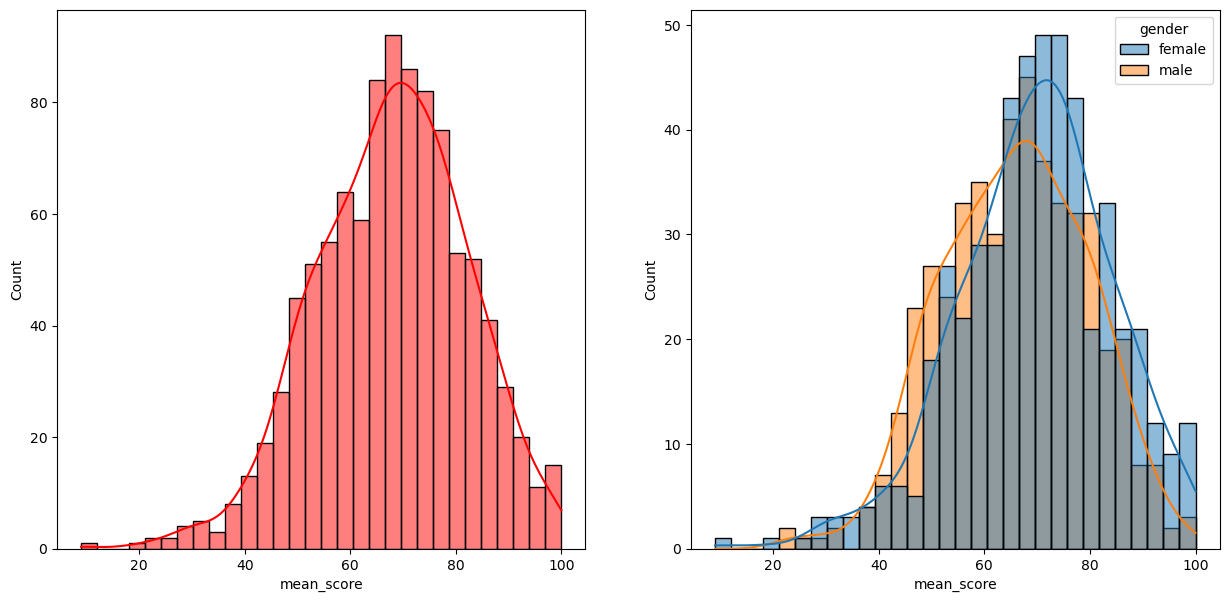

In [122]:
# More Visualization
fig,axis = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'mean_score', bins = 30, kde = True, color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'mean_score', bins = 30, kde = True, hue = 'gender')
sns.histpot(data = df, x = 'mean_score', bins= 30, kde = True, hue = 'gender')
sns.histplot(data = df, x = '')

## Insights
- Female student performed better than male students.
  

<Axes: xlabel='mean_score', ylabel='Count'>

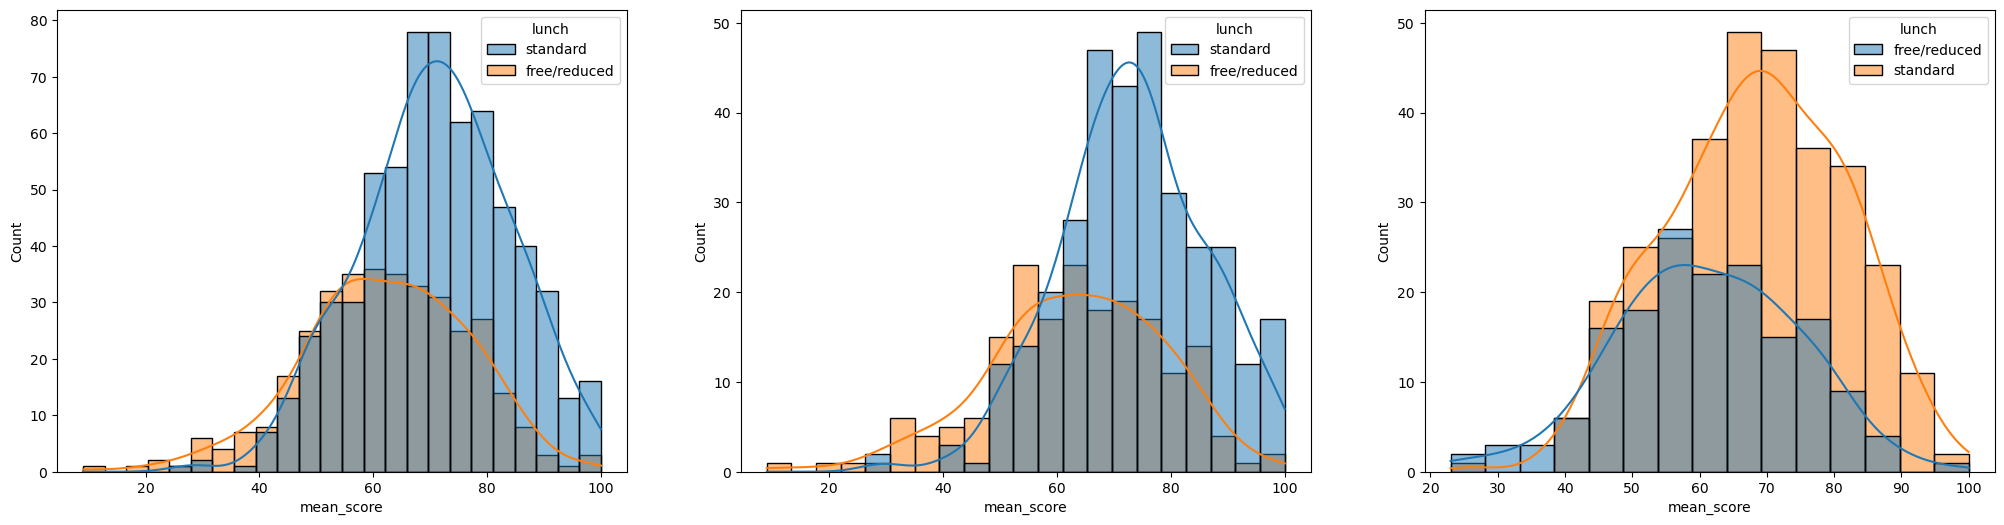

In [138]:
fig, axis = plt.subplots(1, 3, figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'mean_score', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'mean_score', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'mean_score', kde = True, hue = 'lunch')

## Insights
- Standard lunch helps student perform well in exams for both male and female.

<Axes: xlabel='mean_score', ylabel='Count'>

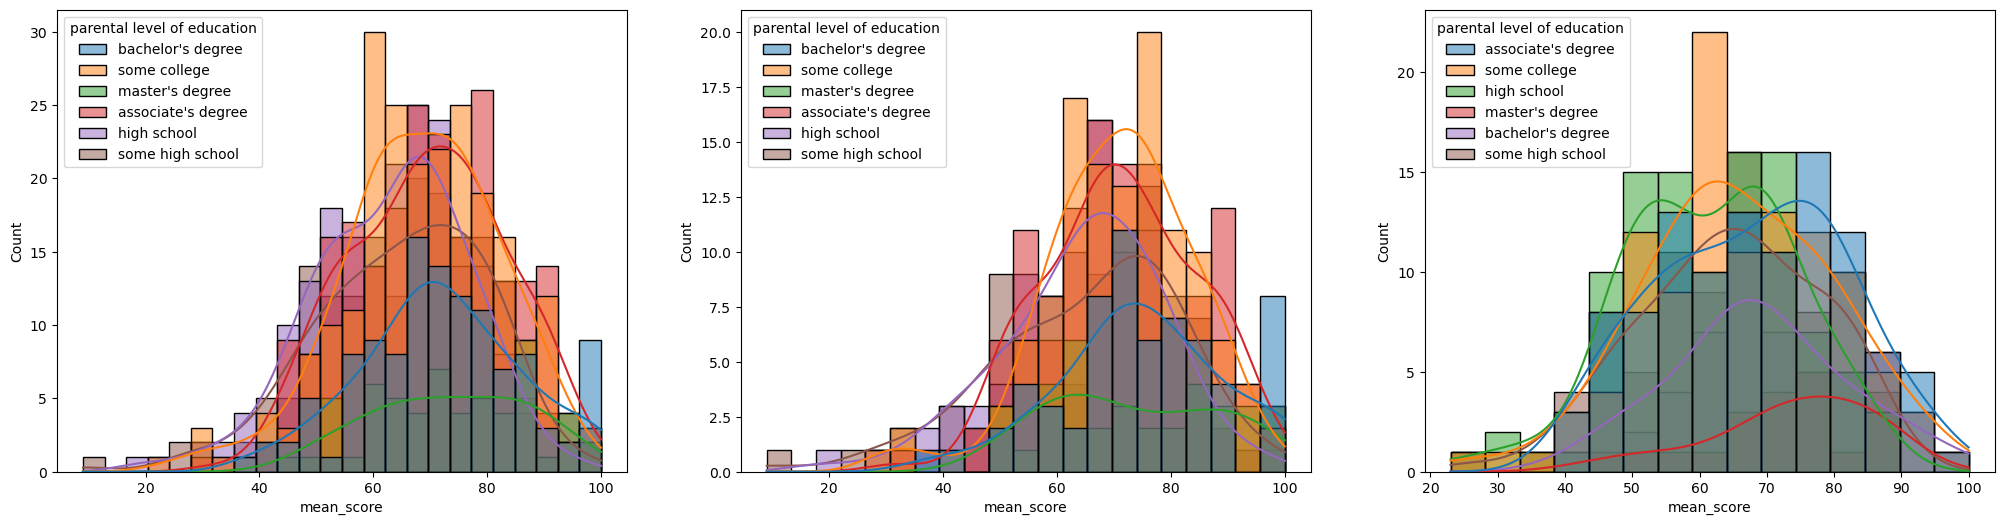

In [147]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'mean_score', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'mean_score', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'mean_score', kde = True, hue = 'parental level of education')

<Axes: xlabel='mean_score', ylabel='Count'>

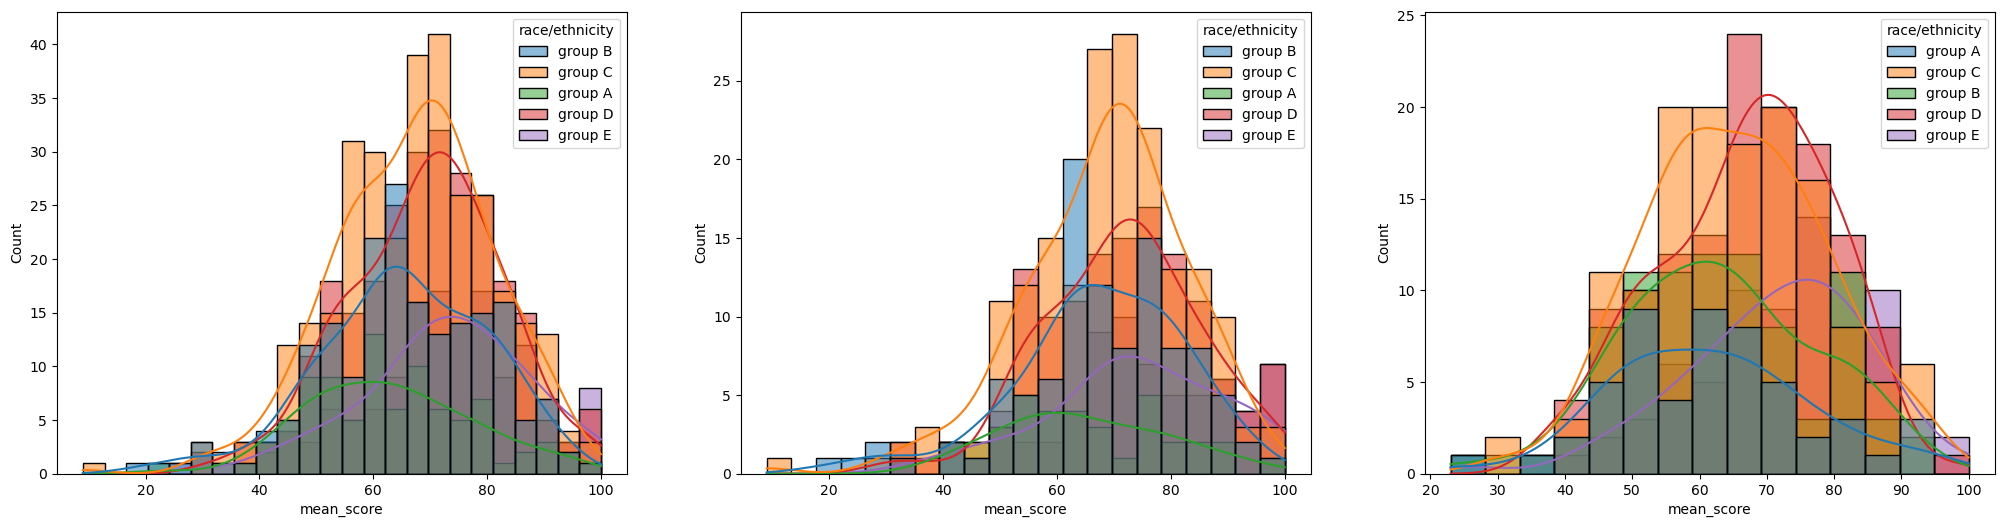

In [149]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'mean_score', kde = True, hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'mean_score', kde = True, hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'mean_score', kde = True, hue = 'race/ethnicity')

## Insights
- Student of Group A and E tends to perform poorly in exam.